# KNN


## In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv("nba_2013.csv")
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
df.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

#### let's remove all the column which won't make any prediction about thye score
1.Player name has not that much impact on score </br>

2.team id </br>

3.season </br>

4.season end </br>



In [4]:
df.drop(['player','bref_team_id','season_end','season'],axis=1,inplace=True)

In [5]:
df.columns

Index(['pos', 'age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa',
       'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [6]:
df.shape

(481, 27)

In [7]:
df.isnull().values.any()   #is there any null present or not

True

In [8]:
df.isnull().sum()

pos      0
age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      2
x3p      0
x3pa     0
x3p.    67
x2p      0
x2pa     0
x2p.     3
efg.     2
ft       0
fta      0
ft.     20
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
pts      0
dtype: int64

In [9]:
#filling null values
df["fg."]=df["fg."].fillna(value=df["fg."].median())
df["x3p."]=df["x3p."].fillna(value=df["x3p."].median())
df["ft."]=df["ft."].fillna(value=df["ft."].median())
df["x2p."]=df["x2p."].fillna(value=df["x2p."].median())
df["efg."]=df["efg."].fillna(value=df["efg."].median())

In [10]:
df.isnull().sum()

pos     0
age     0
g       0
gs      0
mp      0
fg      0
fga     0
fg.     0
x3p     0
x3pa    0
x3p.    0
x2p     0
x2pa    0
x2p.    0
efg.    0
ft      0
fta     0
ft.     0
orb     0
drb     0
trb     0
ast     0
stl     0
blk     0
tov     0
pf      0
pts     0
dtype: int64

In [11]:
#statistical Description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,481.0,26.509356,4.198265,19.0,23.000000,26.000000,29.00000,39.0
g,481.0,53.253638,25.322711,1.0,32.000000,61.000000,76.00000,83.0
gs,481.0,25.571726,29.658465,0.0,0.000000,10.000000,54.00000,82.0
mp,481.0,1237.386694,897.258840,1.0,388.000000,1141.000000,2016.00000,3122.0
fg,481.0,192.881497,171.832793,0.0,47.000000,146.000000,307.00000,849.0
fga,481.0,424.463617,368.850833,0.0,110.000000,332.000000,672.00000,1688.0
fg.,481.0,0.436443,0.098467,0.0,0.401000,0.438000,0.47900,1.0
x3p,481.0,39.613306,50.855639,0.0,0.000000,16.000000,68.00000,261.0
x3pa,481.0,110.130977,132.751732,0.0,3.000000,48.000000,193.00000,615.0
x3p.,481.0,0.291500,0.147080,0.0,0.262626,0.330976,0.36646,1.0


In [12]:
df.dtypes

pos      object
age       int64
g         int64
gs        int64
mp        int64
fg        int64
fga       int64
fg.     float64
x3p       int64
x3pa      int64
x3p.    float64
x2p       int64
x2pa      int64
x2p.    float64
efg.    float64
ft        int64
fta       int64
ft.     float64
orb       int64
drb       int64
trb       int64
ast       int64
stl       int64
blk       int64
tov       int64
pf        int64
pts       int64
dtype: object

In [13]:
#Converting Pos=object dataypes into numerical 
df1=pd.get_dummies(df["pos"],drop_first=True)
df1.columns

Index(['F', 'G', 'PF', 'PG', 'SF', 'SG'], dtype='object')

In [14]:
pd.concat([df,df1],axis=1)

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,blk,tov,pf,pts,F,G,PF,PG,SF,SG
0,SF,23,63,0,847,66,141,0.468,4,15,...,26,30,122,171,0,0,0,0,1,0
1,C,20,81,20,1197,93,185,0.503,0,0,...,57,71,203,265,0,0,0,0,0,0
2,PF,27,53,12,961,143,275,0.520,0,0,...,36,39,108,362,0,0,1,0,0,0
3,SG,28,73,73,2552,464,1011,0.459,128,300,...,3,146,136,1330,0,0,0,0,0,1
4,C,25,56,30,951,136,249,0.546,0,1,...,46,63,187,328,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,SG,20,72,16,1765,345,808,0.427,40,188,...,16,204,151,939,0,0,0,0,0,1
477,SG,28,64,9,1810,387,889,0.435,135,350,...,12,95,156,1144,0,0,0,0,0,1
478,PF,25,79,78,2718,582,1283,0.454,90,292,...,36,165,213,1417,0,0,1,0,0,0
479,C,21,82,3,1416,172,404,0.426,0,1,...,41,87,170,490,0,0,0,0,0,0


In [15]:
df=df.drop("pos",axis=1)

In [16]:
df.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [17]:
x=df.drop("pts",axis=1)
y=df.loc[:,'pts']

#### Checking Multicolinearity

#### Here we will check multicolinearity using variance inflation factor 

In [90]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,age,1.119755
1,g,7.955475
2,gs,6.154819
3,mp,43.944522
4,fg,inf
5,fga,inf
6,fg.,19.595994
7,x3p,inf
8,x3pa,inf
9,x3p.,1.768741


In [20]:
#whichever value will be greater than 10 would be considered as highly correlated hence remove all these features
x=x.drop(["mp","fga","x3pa","x2pa","ft","orb","tov","fg","x3p","x2p","trb","efg."],axis=1)

In [21]:
x_scaled=scaler.fit_transform(x)
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Features,VIF
0,age,1.034078
1,g,4.678530
2,gs,3.854467
3,fg.,5.281624
4,x3p.,1.202606
5,x2p.,4.823718
6,fta,3.700094
7,ft.,1.161891
8,drb,6.691621
9,ast,3.309241


In [22]:
# As we see upper vif dataset we won't have any data having vif greater than 10 hence all these data will give better result
new_df=pd.concat([x,y],axis=1)

In [23]:
new_df

,age,g,gs,fg.,x3p.,x2p.,fta,ft.,drb,ast,stl,blk,pf,pts
0,23,63,0,0.468,0.266667,0.492063,53,0.660,144,28,23,26,122,171
1,20,81,20,0.503,0.330976,0.502703,136,0.581,190,43,40,57,203,265
2,27,53,12,0.520,0.330976,0.520000,119,0.639,204,38,24,36,108,362
3,28,73,73,0.459,0.426667,0.472574,336,0.815,230,248,35,3,136,1330
4,25,56,30,0.546,0.000000,0.548387,67,0.836,183,40,23,46,187,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,20,72,16,0.427,0.212766,0.491935,326,0.641,159,217,78,16,151,939
477,28,64,9,0.435,0.385714,0.467532,285,0.825,137,95,46,12,156,1144
478,25,79,78,0.454,0.308219,0.496468,229,0.712,310,182,167,36,213,1417
479,21,82,3,0.426,0.000000,0.426799,200,0.730,235,92,40,41,170,490


(14.0, 0.0)

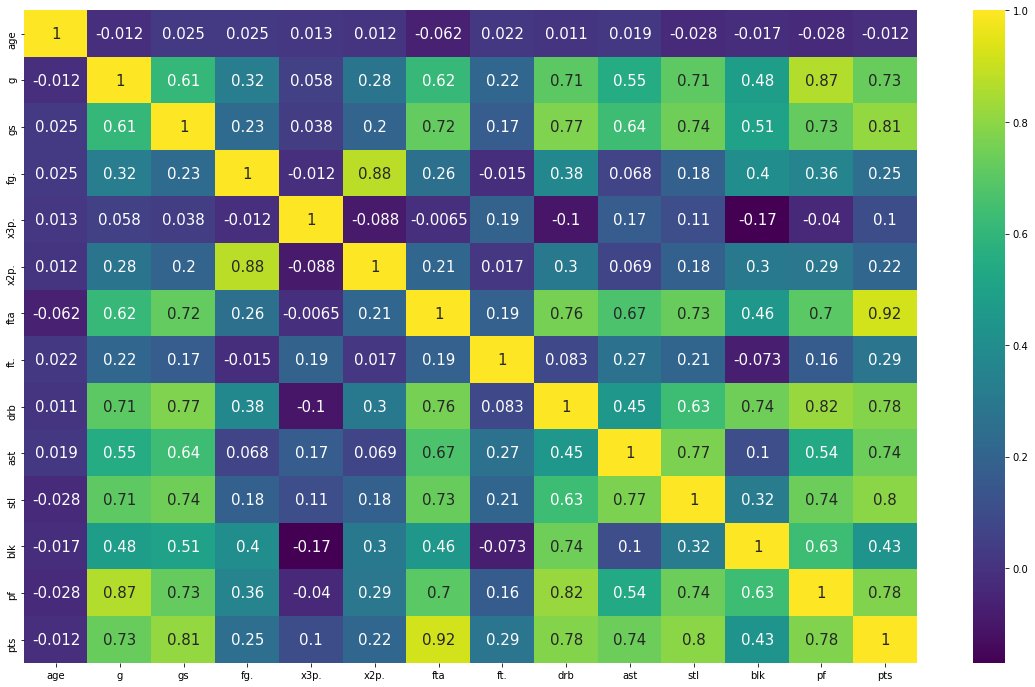

In [24]:
#using correlation matrix will check how many of these feature are highly interpretable with target variable
plt.figure(figsize=(20,12))
corr=new_df.corr()
ax=sns.heatmap(corr,cmap="viridis",annot=True,annot_kws={"size":15})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [25]:
## Now will extract only those value which will have correlation greater than and equal to 50.5 with target variable
def HighlyCorrelated(data,threshold):
    feature=[]
    values=[]
    for ele,index in enumerate(data.index):
        if abs(data[index])> threshold:
            feature.append(index)
            values.append(data[index])
    df=pd.DataFrame(data=values,index=feature,columns= ["Correlation"])
    return df
threshold=0.5
corr_df=HighlyCorrelated(corr.pts,threshold)
corr_df

,Correlation
g,0.728462
gs,0.810294
fta,0.918979
drb,0.784675
ast,0.738295
stl,0.797449
pf,0.778060
pts,1.000000


#### Now we will make our model based on all the highly correlated functions


In [121]:
x=new_df.loc[:,["g","gs","fta","drb","ast","stl","pf"]]
x_scaled=scaler.fit_transform(x)
y=new_df.loc[:,"pts"]
print(x.shape)
print(y.shape)

(481, 7)
(481,)


In [122]:
# Splitting the data inn train test set
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(384, 7)
(384,)
(97, 7)
(97,)


In [145]:
#finding the best value of k for knn
from sklearn.neighbors import KNeighborsRegressor
error_rate=[]
for i in range(1,31):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error_rate.append(y_pred!=y_test)
    
        

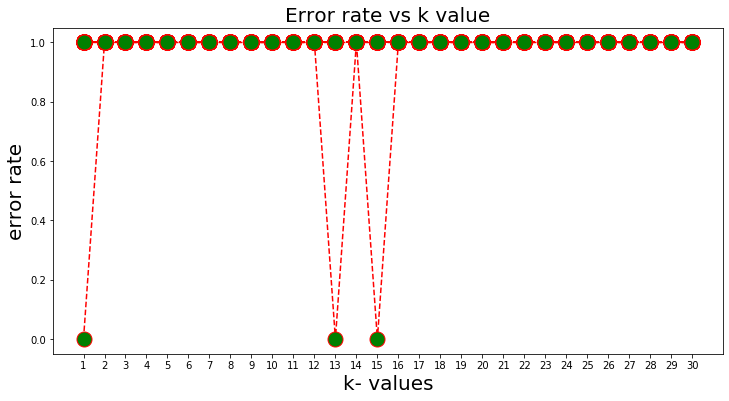

In [146]:
plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()


In [149]:
#After k=15 there is not fuctuation has been seen hence we will decide k=15
knn=KNeighborsRegressor(n_neighbors=15)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=15)

In [150]:
y_pred=knn.predict((x_test))
r2_score(y_test,y_pred)

0.9073000368612247

In [151]:
output=pd.DataFrame({"Actual":y_test, "Predicted":y_pred.astype(int)})
output.head(20)

,Actual,Predicted
13,564,595
470,190,276
63,7,54
115,1394,1260
228,9,11
358,44,48
277,2010,1602
216,588,834
400,1071,790
147,68,80


<Figure size 1440x864 with 0 Axes>

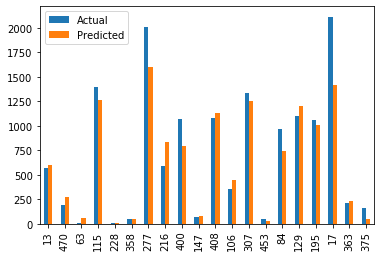

In [152]:
plt.figure(figsize=(20,12),facecolor="b")
out=output.head(20)
out.plot(kind="bar")
plt.show()
